In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, TerminateOnNaN
from sklearn.preprocessing import StandardScaler

# Q.1
Function Approximation for Dataset 1 using MLFFNN with one hidden layer having 8 nodes

In [2]:
import pandas as pd
data = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset1\train100.csv")
data.columns

test = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset1\test.csv")
x_test = test[["x1", "x2"]]
y_test = test["y"].to_numpy(dtype=np.float32).reshape(-1, 1)

In [3]:
# ---- Prepare data ----
X = data[["x1", "x2"]].to_numpy(dtype=np.float32)
y = data["y"].to_numpy(dtype=np.float32).reshape(-1, 1)


# ---- Build model (no explicit initializers) ----
BETA = 1.0
sgd = SGD(learning_rate=0.07, momentum=0.9, clipnorm=1.0)

reg_model = Sequential([
    Dense(8, input_shape=(X.shape[1],), activation="tanh"),
    Dense(1, activation='linear')
])

reg_model.compile(optimizer=sgd, loss='mse')

# ---- Train ----
early_stop = EarlyStopping(monitor='loss', min_delta=0.001, restore_best_weights=True)
nan_killer = TerminateOnNaN()

history = reg_model.fit(
    X, y,
    batch_size=1,   # pattern mode
    epochs=100,
    shuffle=True,
    # callbacks=[early_stop, nan_killer],
    verbose=1
)


Epoch 1/100


c:\Users\hrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 248.4765
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 150.1772
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101.6421
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.5951
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.8892
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 114.3078
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93.1774
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98.7199 
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98.5801 
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92.0436
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84.7662
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80.2122
Epoch 13/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.9576
Epoch 14/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.7314
Epoch 15/100
100/100 ━━━━━━━━━━━━

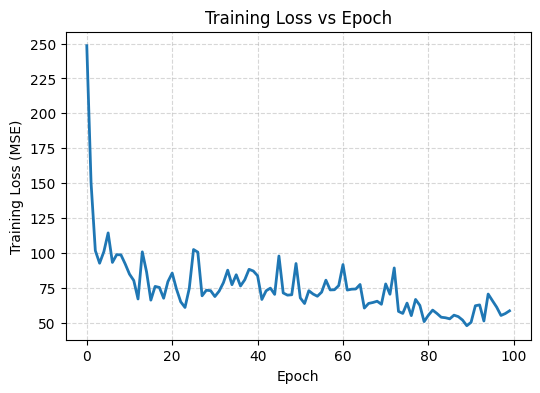

In [4]:
# ---- Plots & metrics using the model you already trained above ----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 1) Training loss vs epoch
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Training Loss vs Epoch")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



RMSE (original scale): 44.153378
R^2  (original scale): 0.825890


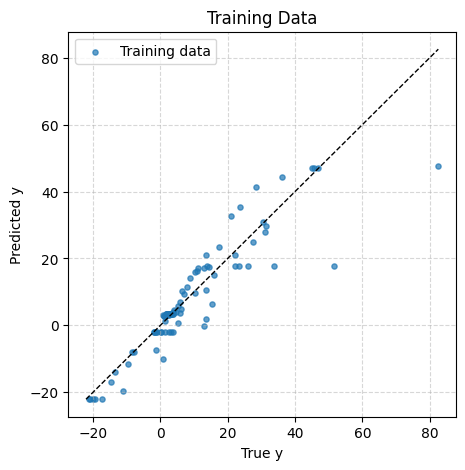

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 2) Predictions (denormalize back to original scale)
y_pred = reg_model.predict(X, verbose=0) 

# 3) Metrics on the whole dataset
rmse = mean_squared_error(y, y_pred)
r2   = r2_score(y, y_pred)
print(f"RMSE (original scale): {rmse:.6f}")
print(f"R^2  (original scale): {r2:.6f}")

# 4) Scatter: True vs Predicted (whole dataset)
lo = np.min(np.concatenate([y, y_pred]))
hi = np.max(np.concatenate([y, y_pred]))

plt.figure(figsize=(5,5))
plt.scatter(y, y_pred, s=14, label='Training data', alpha=0.7)
plt.plot([lo, hi], [lo, hi], 'k--', linewidth=1)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Training Data")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


RMSE (original scale): 31.257387
R^2  (original scale): -1.161764


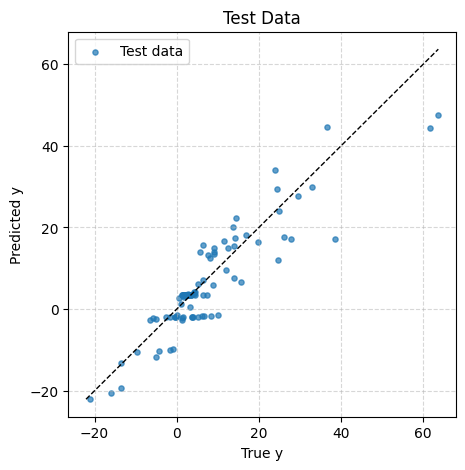

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 2) Predictions (denormalize back to original scale)
y_pred_test = reg_model.predict(x_test, verbose=0) 

# 3) Metrics on the whole dataset
rmse = mean_squared_error(y_test, y_pred_test)
r2   = r2_score(y_test, y_pred)
print(f"RMSE (original scale): {rmse:.6f}")
print(f"R^2  (original scale): {r2:.6f}")

# 4) Scatter: True vs Predicted (whole dataset)
lo = np.min(np.concatenate([y_test, y_pred_test]))
hi = np.max(np.concatenate([y_test, y_pred_test]))

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_test, s=14, label='Test data', alpha=0.7)
plt.plot([lo, hi], [lo, hi], 'k--', linewidth=1)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Test Data")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Issues faces - 
1. nan without glorot initialiser and scaling
2. 0.7 learning rate is too high

# 3D plots


c:\Users\hrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\hrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


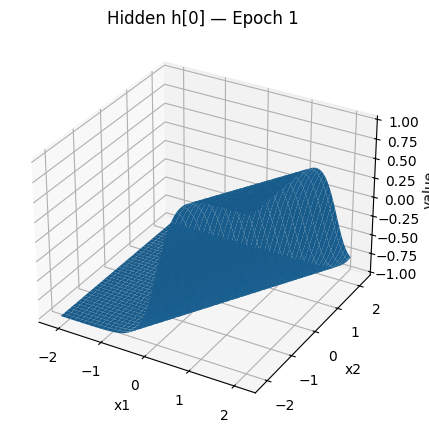

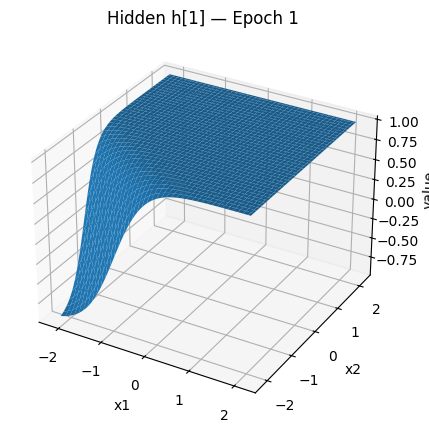

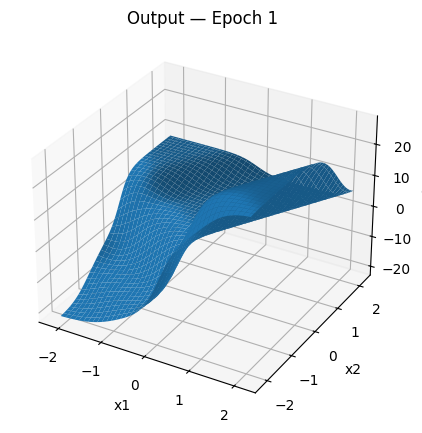

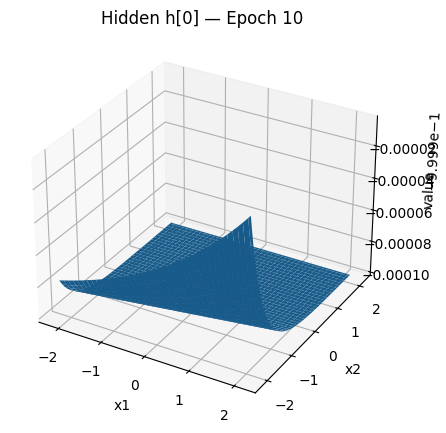

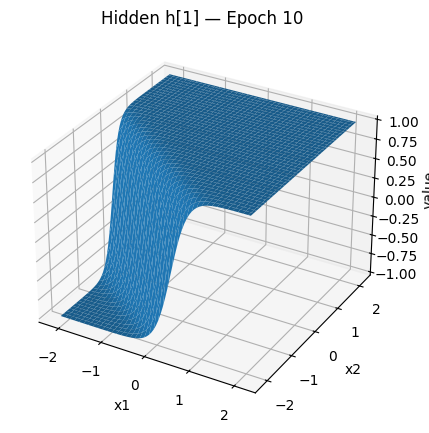

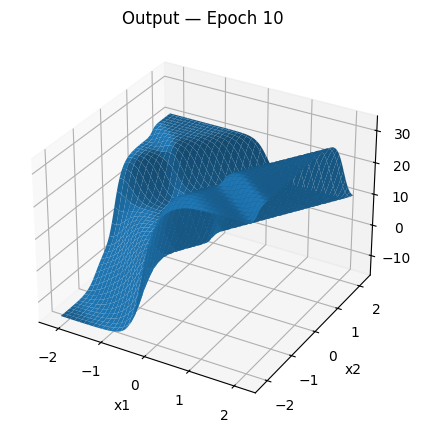

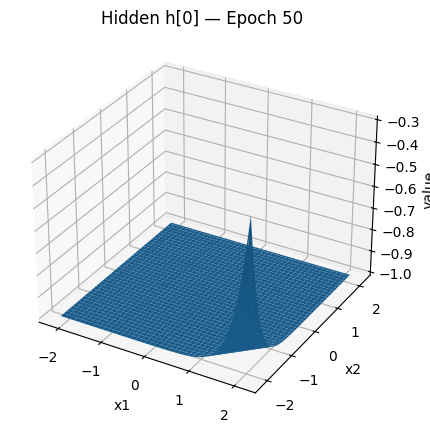

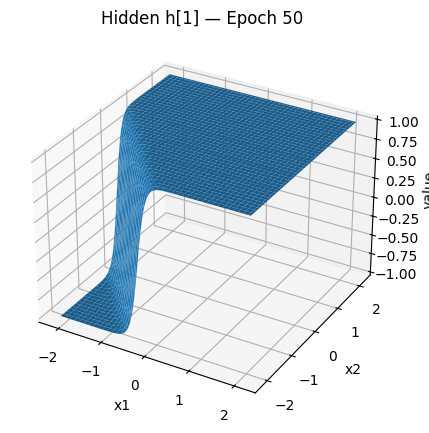

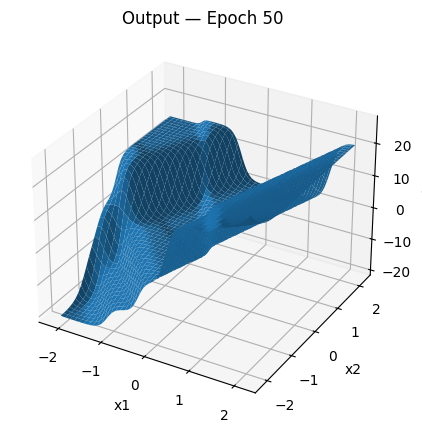

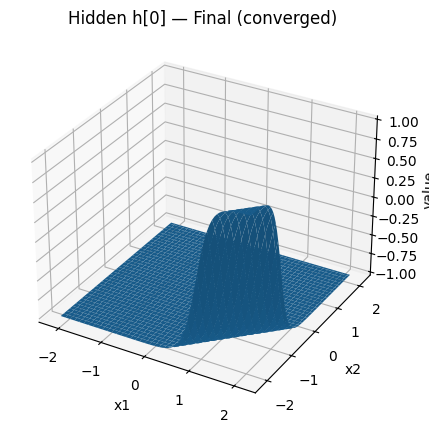

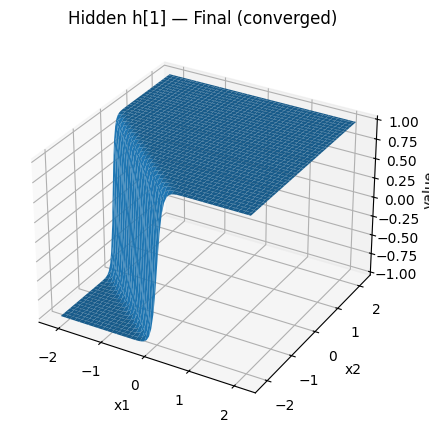

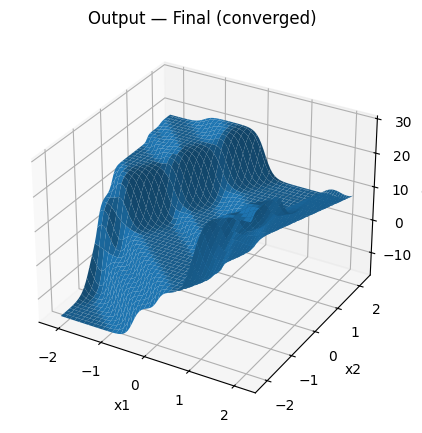

In [14]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

import numpy as np
import matplotlib.pyplot as plt

def make_grid(X, n=80):
    x1_min, x1_max = float(np.min(X[:,0])), float(np.max(X[:,0]))
    x2_min, x2_max = float(np.min(X[:,1])), float(np.max(X[:,1]))
    pad1 = 0.05*(x1_max-x1_min+1e-9)
    pad2 = 0.05*(x2_max-x2_min+1e-9)
    x1 = np.linspace(x1_min-pad1, x1_max+pad1, n)
    x2 = np.linspace(x2_min-pad2, x2_max+pad2, n)
    X1g, X2g = np.meshgrid(x1, x2)
    grid = np.stack([X1g.ravel(), X2g.ravel()], axis=1).astype(np.float32)
    return X1g, X2g, grid

def plot_surface(X1g, X2g, Z, title):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1g, X2g, Z.reshape(X1g.shape), linewidth=0, antialiased=True)
    ax.set_xlabel("x1"); ax.set_ylabel("x2"); ax.set_zlabel("value")
    ax.set_title(title)
    plt.show()

def plot_hidden_and_output(model, X, hidden_idx=(0,1), title_suffix=""):
    X1g, X2g, grid = make_grid(X)
    dens = [l for l in model.layers if hasattr(l, "get_weights")]
    W1, b1 = dens[0].get_weights()
    W2, b2 = dens[1].get_weights()
    H = np.tanh(grid @ W1 + b1)
    Z1 = H[:, hidden_idx[0]]
    Z2 = H[:, hidden_idx[1]]
    Yhat = (H @ W2 + b2).ravel()
    plot_surface(X1g, X2g, Z1, f"Hidden h[{hidden_idx[0]}] — {title_suffix}")
    plot_surface(X1g, X2g, Z2, f"Hidden h[{hidden_idx[1]}] — {title_suffix}")
    plot_surface(X1g, X2g, Yhat, f"Output — {title_suffix}")

BATCH = 1
reg_model.fit(X, y, batch_size=BATCH, epochs=1, shuffle=True, verbose=0)
plot_hidden_and_output(reg_model, X, hidden_idx=(0,1), title_suffix="Epoch 1")

reg_model.fit(X, y, batch_size=BATCH, epochs=9, shuffle=True, verbose=0)
plot_hidden_and_output(reg_model, X, hidden_idx=(0,1), title_suffix="Epoch 10")

reg_model.fit(X, y, batch_size=BATCH, epochs=40, shuffle=True, verbose=0)
plot_hidden_and_output(reg_model, X, hidden_idx=(0,1), title_suffix="Epoch 50")

reg_model.fit(X, y, batch_size=BATCH, epochs=50, shuffle=True, verbose=0)
plot_hidden_and_output(reg_model, X, hidden_idx=(0,1), title_suffix="Final (converged)")


In [13]:
reg_model.layers

[<Dense name=dense_8, built=True>, <Dense name=dense_9, built=True>]